# Pandas Reference Sheet

In [ ]:
import pandas as pd
import numpy as np

help(pd.DataFrame.loc)   #to get help on pandas functions

pd.set_option("display.max_rows", None, "display.max_columns", None)  #to view full DF

# Create/Export

In [ ]:
DataFrame([data, index, columns, dtype, copy])

#create from np array
data = pd.DataFrame(data = data[1:,1:], index=data[1:,0], columns=data[0,1:])    
data2 = pd.DataFrame(np.array([[1,2,3],[4,5,6],[7,8,9]]), index=['a','b','c'],columns=['a', 'b', 'c'])

#create from dict
d = {'col1':[1,2], 'col2':[3,4]}
data3 = pd.DataFrame(d)                                                 
data4 = pd.DataFrame.from_dict(d,orient='index', columns=['x','y'])     #create from dict, orient to use key as index

df = pd.DataFrame(list(my_dict.items()),columns = ['Products','Prices'])  #alternative to create from dict

#create from csv 
missing = ["n/a", "na", "N.A.", "--"]           #handle missing values when reading
data = pd.read_csv('exp_tweet.csv',encoding="ISO-8859-1",skiprows=1,na_values=missing)  #skipping 1st row in file

#create from list
my_lists = [[2, 4], [1, 3]]                                  
headers = ['col1', 'col2']
df = pd.DataFrame(my_lists, columns = headers)

#to export DF to csv with tab as delimiter
data.to_csv(r'results.csv',sep='\t', index=False)        

#to export DF to txt file
data.to_csv(r'results.txt', header=None, index=None, sep=' ', mode='a')  

#to convert DataFrame to dictionary
data.to_dict(dict)   #col names are keys, values are dictionaries of index:element
data.to_dict(list)   #col names are keys, values are lists of column elements

#to convert DataFrame to np array
data.to_numpy()

#to make a copy of DataFrame 
data1 = data.copy()

# Attributes

In [ ]:
data.shape           #return dims of DF as tuple 
data.size            #return number of elements in DF
data.dtypes          #get data type of each column
df = df.astype(int)  #set data type
data.dtypes.value_counts()  #count of cols for each data type 
data.columns         #return column labels of DF (len(df.columns) to get number of cols)
data.columns.get_loc('c')    #obtain int posn of column 'c'
data.index           #return index(row) labels of DF (len(df.index) to get number of rows)
data.ndim            #return no. of axes/array dims (1 for Series, 2 for DF)
data.head(10)
data.tail(10)
data.info()           #return DF info (dtype, how many non-null)
data.count()          #return number of non-null per col
data.describe()       #summary stats of each col
data.corr()           #correlation values
data['col1'].unique()         #return unique values in col
data['col1'].value_counts()   #return count of each value

# Selection

In [ ]:
#basic indexing [col][row]
data['a']                 #selecting particular col (returns a Series), same as data.iloc[:,1]
data[['a']]               #selecting particular col (returns a DataFrame)
data[['a','b','c']]       #selecting using list of cols
data[['a','b','c']][:100] #selecting using list of cols and slicing rows
data[(data.AAA <= 6) & (data.index.isin([0, 2, 4]))]   #select row using data.index.isin

#select by label [row,col]
data.loc['row1']                  #select row label 1 (index by label)
data.loc[['row1','row2','row3']]  #select by list of rows
data.loc['rowc','colb']  #return element in row c column b, same as data.at['c','b']
data.loc[1:99:2,'a':'d']   #select by slicing using labels, both start and stop are inclusive

#select by int/position [row,col]
data.iloc[3]        #select row 3 (returns a pd Series)
data.iloc[[2,5,7]]  #select rows 2,5,7 (returns a pd DF)
data.iloc[3:7]      #select rows 3 to 6 (end is not inclusive)
data.iloc[3,5]      #return element in row 3, col 5, same as data.iat[3,5]
data.iloc[2,[0,2]]  #select col by list
data.iloc[3,[3:6]]  #select col by slicing
data.iloc[[True,True,False]]       #select rows by boolean mask
data.iloc[lambda x: x.index%2==0]  #select rows by function, applicable for loc too
data.iloc[:,[True,False,False]]  #select col by boolean mask, applicable for loc too

x = data.columns.get_loc('c')  #obtain int posn of col c
data.iloc[:,x:x+2]             #select cols using int posn


#select rows by conditions
data[data['col1']>1000]            #select rows where value meet condition in col1
df.loc[df.AAA >= 5, ['BBB', 'CCC']] = 555  #change values in given cols when conditions met for row
data[(data['col1'].isin([0,2]))]   #select rows where values in col1 is in list
data[data['col1'].between(15,20)]     #select rows where value is betw 15 and 20 (inclusive)
data.loc[(data.title == ‘Terrible’) & ~(data.points >= 5)]   #select rows using AND condition and ~ negation
data.loc[(data.title == ‘Terrible’) | (data.points >= 5)]   #select rows using OR condition
data = data.nlargest(3, 'col3')       #get rows of top 3 values in col3
data = data.nsmallest(3, 'col2')      #get rows of lowest 3 values in col2
df[df['Country'].str.count('^[pP].*')>0]    #select rows where regex found in specified col
df[df['Country'].str.match('^P.*')==True]   #select rows where regex found in specified col
df[df['Country'].str.contains('^I.*')==True] #select rows where regex found in specified col


#select cols by conditions
data.loc[:,(data>1).any()]      #select cols with any value>1
data.loc[:,(data>1).all()]      #select cols with all values>1
data.loc[:,data.isna().any()]   #select cols with any NaN values
data.loc[:,data.isna().all()]   #select cols with all NaN values
data.loc[:,data.where(data=='A+').any()]   #select cols if any element matches condition
data.loc[:,data.applymap(lambda x: bool(re.match(r'A\+',x))).any()]    #select cols if any element matches regex
data[data.select_dtypes(include=['float']).columns]       #select columns by dtype

data[data.filter(like='grade').columns]     #select cols if col name contains grade
data[data.filter(regex=r'2\d{2}').columns]  #select cols by col name using regex

# Manipulating DataFrame

In [ ]:
#sorting
data.sort_index()                                      #sort DF by index
data.sort_values(by='col1', ascending=False)           #sort DF by col 
data.sort_values(by=['a','b'], ascending=[True,False]) #sort DF by col a ascending then b descending
data.rank()                                            #rank each element 

#replacing values
data['text'] = data['text'].str.replace('[^\w\s]','')        #replace using regex found in given col
data['col1'].replace(0,data['col1'].median(),inplace=True)   #for given col, replace 0 with median of col
data['month'].map({‘1’:’Jan’, ‘2’:’Feb’})                    #map values using dict (can use function/Series too)
data = data.replace({"?": np.nan, "--": np.nan})             #for whole DF, replace using dict

#extracting values
df['Capital'] = df['Country'].map(country_capital)       #country_capital is dict of country:capital
df['Counts'] = df.groupby(['Color']).transform(len)      #number of counts in another col

df['abb'] = df['Country'].str.extract(r'(^w{5})')        #create new col extracting 1st 5 characters from given col
df['nums'] = df['c1'].str.findall(r'\d+\/\d+\/\d+|\d+')  #create new col extracting nums from given col
df['name'] = df['col'].str.split('\s+').str[0]           #to obtain first item from split by regex
df['name'] = df['col'].str.rsplit('\s+').str[-1]         #to obtain last item from rsplit by regex

p = re.compile('RT\s*@(?P<target>[^:]*):')    #extract retweet
test['retweet_target']=test['text'].apply(lambda x: p.match(str(x)).group('target') if p.match(str(x)) else '') 

#applying functions on values
data['d'] = data['a']+data['b']                           #add values from 2 cols to form new col  
data['col1'] = data['col1']-data['col1'].mean()           #performing same operation on each value in col
data['d'] = data.apply(lambda x: x['a']+x['b'], axis=1)   #to apply function to given col
data = data.applymap(lambda x: len(str(x)))               #to apply function to every element

#normalization
dist = (dist-dist.min().min())/(dist.max().max()-dist.min().min())  #min-max normalise DF with overall max and min
normalized_df=(df-df.mean())/df.std()             #mean normalization for each col
normalized_df=(df-df.min())/(df.max()-df.min())   #min-max normalization for each col

#remove rows/cols
data.drop(['a','c'])         #drop rows a, c
data.drop(['x','y'], axis=1) #drop cols x, y
data.pop('col1')             #drop col1

#add rows/cols
data.loc['k'] = ['Suresh', 15.5, 1, 'yes']   #add new row 'k'
data['col1'] = ['Red','Blue','Orange']       #add new col

data = pd.DataFrame({"col1": range(3),"col2": range(3)})   #to append data from dict
df = df.append(data)

#row/index operations
df = df.reset_index()    #reset index
df.index.name = 'index'  #rename index
data[::-1]               #to reverse order of rows
data['col1'].argmax()    #get row of max value in col1

#col operations
df = df.rename(columns= {'index': 'word', 0:'count'})   #rename columns
data.columns = ['col1', 'col2', 'col3']   #rename columns
data = data[['col3','col2','col1']]       #change order of columns
data['col1'].tolist()                     #get a list of values from col
df['Country'].str.count(r'(^F.*)').sum()       #no. of times regex appeared in given col

#grouping data
df.groupby('country')['price'].min()              #find min price for each country 
df.groupby(['country','region']).rating.count()   #find rating count for each group of country-region
df.groupby('country').['price'].agg([min,max])    #find min and max price for each country

symbols = df.groupby('symbol')    #group data by given col
for symbol, group in symbols:     #to access all groups
    print(symbol)
    print(group)

aapl = symbols.get_group('AAPL')  #to access given group

#binning data
bins = [mmin, 2085, 95714,  mmax]
labels =['low','median','high']
test['popularity_bin'] = pd.cut(test['# of followers'], bins,labels=labels)

df['logic'] = np.where(df['AAA'] > 5, 'high', 'low')  #binning in new col depending on given col 


In [ ]:
#merging dataframes
pd.merge(df_a, df_b, on='subject_id', how='outer')
pd.merge(df_a, df_b, on='subject_id', how='inner')
pd.merge(df_a, df_b, on='subject_id', how='right')
pd.merge(df_a, df_b, on='subject_id', how='left')
pd.merge(df_a, df_b, on='subject_id', how='left', suffixes=('_left', '_right'))  #adding suffixes to columns to differentiate source

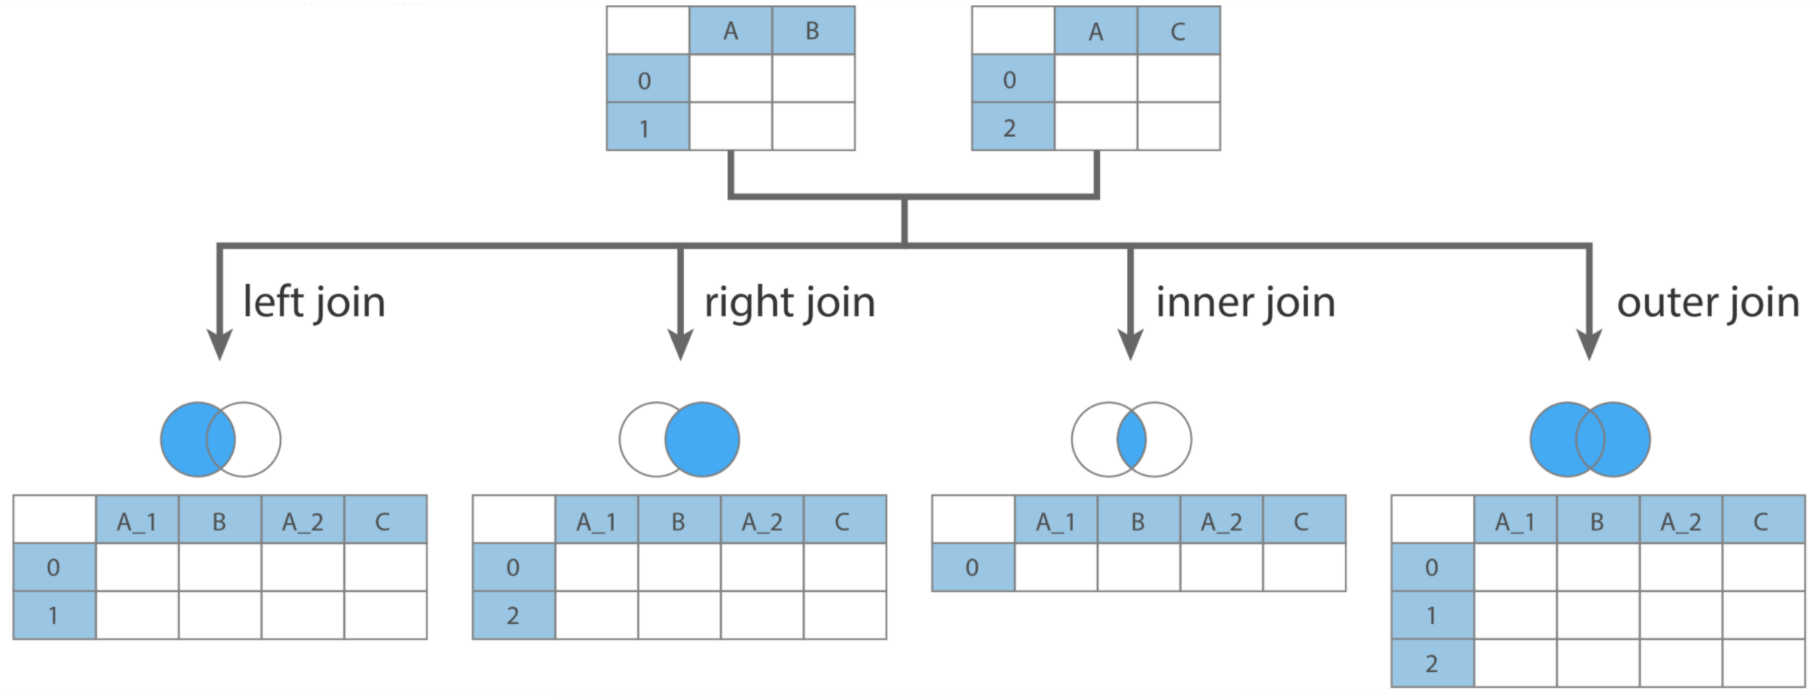

In [ ]:
#concatenating dataframes
df_new = pd.concat([df_a, df_b], axis = 1, join='inner')

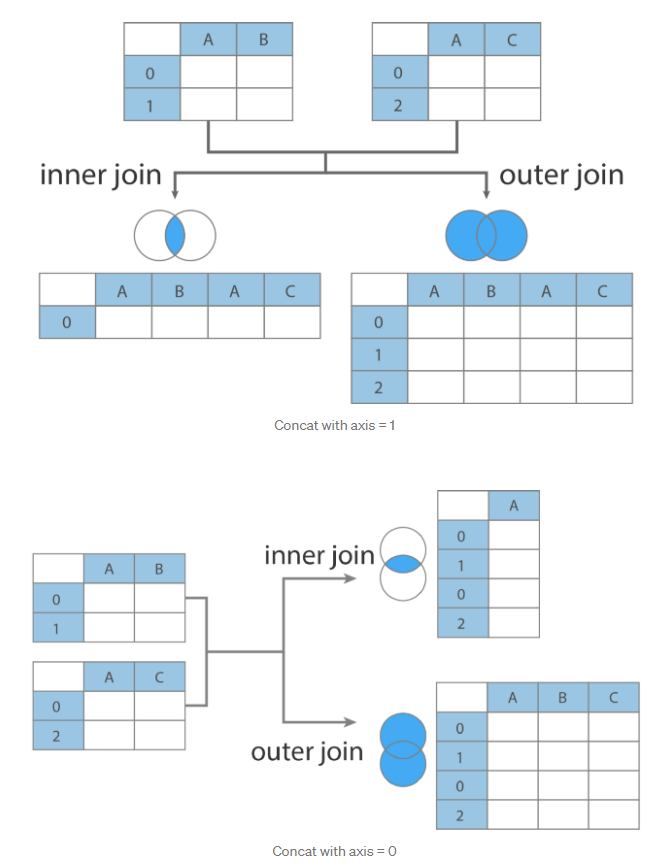

# Arithmetic Operations

In [ ]:
data.sum()
data.cumsum()
data.min()
data.max()
data.idxmin()
data.idxmax()
data.mean()
data.median()
data.mode()

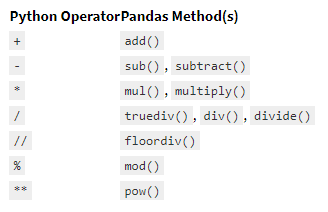

# Handling Missing Values

In [ ]:
#checking
data['col1'].isna()              #check column for empty of NA values (avoid using data[col1]==None)
data['col1'].isna().values.any() #check if any value is empty/NA
data['col1'].isna().sum()        #check number of empty/NA values
data.isna().sum()                #check number of empty/NA values in each col in DF
data['col1'].value_counts(dropna=False).loc[np.nan]   #check number of NaN values in col1
data.isna().sum().sum()          #check number of empty/NA values in whole DF

data['col1'].isnull().to_numpy().nonzero()  #return index where there are missing values in col1

#replacing
data['col1'].replace(np.nan,int(0),inplace=True)   #replace NaN with 0
data['col1'].fillna(int(0),inplace=True)           #fill NaN with 0
data['col1'] = data['col1'].apply(lambda x:int(x) if str(x).isnumeric() else int(0))   #replacing non-int with 0

df.fillna(df.mode().iloc[0])       #replace missing values with mode values
data['col1'].replace(0,data['col1'].median(),inplace=True)   #replace with median of col

data = data.replace({"?": np.nan, "--": np.nan})     #replace using dict

#dropping
data.dropna()               #drop rows with at least 1 missing value
data.dropna(axis='columns') #drop cols with at least 1 missing value
data.dropna(thresh=2)       #drop rows with more than 2 missing values
data.dropna(how='all')      #drop rows where all elements are missing
data.dropna(subset=['# of followers'])  #define which cols to look for missing values

Missing values will be treated differently in computation. For example:

- When summing data, NA (missing) values will be treated as zero.
- If the data are all NA, the result will be 0.
- Cumulative methods like cumsum() and cumprod() ignore NA values by default, but preserve them in the resulting arrays. To override this behaviour and include NA values, use skipna=False.

In particular, 
- The sum of an empty or all-NA Series or column of a DataFrame is 0.
- The product of an empty or all-NA Series or column of a DataFrame is 1.

# Extras

In [ ]:
#convert data type
df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric) #convert given cols to numbers
df = df.apply(pd.to_numeric,errors='ignore') # convert all columns of DataFrame to numbers and ignore cols that cant
df = df.apply(pd.to_numeric,errors='coerce') # convert all columns of DataFrame to numbers and set as Nan for values that cant

data['col1'] = data['col1'].apply(lambda x: int(x) if x.isnumeric() else x)       #convert values in col to int
data['col1'] = data['col1'].apply(lambda x: float(x) if re.match(r'^-?\d+(?:\.\d+)?$',x) else x) #convert values in col to float

#convert Series to DataFrame
stopfreq = pd.Series(' '.join(df['stop']).split()).value_counts()[:100]     
stopfreq = stopfreq.to_frame().reset_index()                                
stopfreq = stopfreq.rename(columns= {'index': 'word', 0:'count'})
stopfreq.index.name = 'index'

#to iterate over rows in DF
for index, row in df.iterrows():          
    print(row['name'], row['score'])

#to iterate over rows in series    
s = pd.Series(['A', 'B', 'C'])    
for index, value in s.items():             
    print(f"Index : {index}, Value : {value}")    
    
#replace non-integers with NaN
cnt = 0
for row in data['# of followers']:
    try: 
        int(row)
    except ValueError:
        #print(cnt)
        data.loc[cnt, '# of followers']=np.nan    
    cnt+=1

In [ ]:
from statistics import mode
mmode = mode([type(i) for i in data['col1']])   #find mode of data type in col

#find values of non-mode data types
error=[(i,type(data['col1'].iloc[i]),data['col1'].iloc[i]) for i in range(len(data['col1'])) if not(type(data['col1'].iloc[i]) == mmode)]

data['col1'] = data['col1'].apply(lambda x: x if type(x) == mmode else "")   #replace non-mode data types

